# Tutorial 1: Principle of Satellite Remote Sensing

**Content creators:** Daniele Corradini

**Content reviewers:** Claudia Acquistapace, Paula Bigalke

**Affiliation:** Institute of Geophysics and Meteorology, University of Cologne, Germany

# Tutorial Objectives

In this tutorial, students should get familiar in effectively managing geostationary satellite data from MSG using Python, learning how to visualize it and utilize its channels to extract meaningful cloud properties.

By the end of this tutorial you will be able to:

* Plot Visible (VIS) and Infrared (IR) channels after filtering outliers and selecting case studies
* Understand how to use MSG channels and their combinations to understand cloud and enviromental features.

# Setup

Understand how the students should run this tutorial and how they will access the data

For now just pretend they can access the institute cluster

Here, I am usinf Python 3.10.12 Kernel (installed with Jupyter PowerToys extenion in VC code). Maybe also give more instruction on how to run it. It can be run easilty also without VC code? Maybe important to define an enviroment with all the needed packages?

Create a google colab notebook and update data in google drive.

## Import libraries

In [2]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#needs to be installed after creating the env: satpy, matploylib, cartopy

## Section 1: Data Preprocessing

This section focuses on accessing and processing MSG satellite data stored in netCDF format. We will explore a case study involving a hailstorm that occurred in Northern Italy on July 24, 2023. Key steps in our data preprocessing will include:

    - Opening the Data: Using xarray to load the dataset, which allows for efficient handling and manipulation of the data.
    - Spatial Visualization: Plotting spatial maps for selected timestamps to visually assess the data at different intervals.
    - Domain Cropping: Narrowing down the dataset to the area of interest, focusing on the region most affected by the hailstorm.
    - Nighttime Data Filtering: Excluding or flagging data collected during nighttime to ensure the analysis is confined to daytime observations when satellite imagery is most effective.
    - Outlier Detection: Examining the distribution of the data to identify and address any outliers that may skew the analysis.
    - Understanding Parallax Correction: Discussing the significance of parallax correction in satellite data to enhance the accuracy of geolocation.
    - Data Regridding: Explaining the process and importance of regridding the data for consistency in spatial analysis across different datasets.

These preprocessing steps are crucial for setting up a robust analysis framework, ensuring that subsequent analyses are based on accurate and relevant satellite data.

1.1 Open Dataset

Define the time span, and open Dataset using xarray

In [3]:
# Define path and filepattern
filepattern = "MSG*.nc"
folder_path = "/data/sat/msg/netcdf/noparallax/2023/07/24/" #When available use the parallaxed corrected here

# Get the list of all file paths
fnames = sorted(glob(folder_path+filepattern))
len(f'Number of timestamps: {len(fnames)}')

# Open the datasets using xarray, merging along the time dimension
ds = xr.open_mfdataset(fnames, combine='nested', concat_dim='time', parallel=True)

ds


<xarray.Dataset> Size: 354MB
Dimensions:  (time: 96, y: 239, x: 351)
Coordinates:
    lat      (y) float32 956B dask.array<chunksize=(239,), meta=np.ndarray>
    lon      (x) float32 1kB dask.array<chunksize=(351,), meta=np.ndarray>
  * time     (time) datetime64[ns] 768B 2023-07-24 ... 2023-07-24T23:04:05
Dimensions without coordinates: y, x
Data variables:
    IR_016   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_039   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_087   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_097   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_108   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_120   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_134   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    VIS006   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    VIS008   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    WV_062   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    WV_073   (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>

## Plot Maps

Plot channels map for a timestamp



In [ ]:
channels = ['VIS006', 'VIS008','IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134', 'WV_062', 'WV_073']
channels_unit = ['Reflectances (%)','Reflectances (%)','Reflectances (%)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)','Brightness Temperature (K)','Brightness Temperature (K)','Brightness Temperature (K)']
channels_cmaps = ['gray','gray', 'gray', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool'] 

extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5

# Select a timestamp
data_ss = ds.isel(time=50)

def plot_single_map(ds, extent, channel, ax, channel_unit, channel_cmap):

    ch_data = ds[channel]

    # Effettuare il plot dei dati del canale corrente
    ch_plot = ax.pcolormesh(ch_data['lon'], ch_data['lat'], ch_data.values.squeeze(),
                                transform=ccrs.PlateCarree(), cmap=channel_cmap, shading='nearest')

    # Aggiungere le linee costiere e i confini dei paesi
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Aggiungere una barra dei colori
    cbar = plt.colorbar(ch_plot, ax=ax, orientation='horizontal', shrink=0.7)
    cbar.set_label(channel_unit)

    # Impostare i limiti di estensione della mappa automaticamente in base ai dati
    ax.set_extent(extent)


    #set axis thick labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=0.75, color='gray', alpha=0.6, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Aggiungere il titolo del subplot
    ax.set_title(f'Channel {channel}')

    return ch_plot


def plot_channels(channels, extent, data_ss, channels_cmaps, channels_unit):
    num_rows = 4
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
    axs = axs.flatten()

    # Plot each channel
    for i, channel in enumerate(channels):
        plot_single_map(data_ss, extent, channel,axs[i],channels_unit[i],channels_cmaps[i])

    # Adjust layout
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    # Show plot
    plt.show()

plot_channels(channels, extent, data_ss, channels_cmaps, channels_unit)

Now try to run again the code but setting the time in line 12 at 5. What happen to the VIS and NIR channels?
Can you guess why?

Remove the nighttime in the dataset for the VIS/NIR channels 

In [5]:
#mask the nighttime for VIS/NIR channels

#Choose time thresholds far from the sunsets and sunrise, considering also the period of the year (Summer!)
#Be careful that the time of the dataset is given in UTC!
time_min = 8
time_max = 16

time_mask = (ds['time.hour'] >= time_min) & (ds['time.hour'] <= time_max)

# Apply the mask across selected variables 
selected_vars = ['IR_016', 'VIS006', 'VIS008']
for var in selected_vars:
    ds[var] = ds[var].where(time_mask, np.nan)

## Plotting the time trend

Plot the time trend to check if the nighttime mask worked

In [ ]:
# Compute 25-50-75th percentile and plot them along the time

ds_quantile = ds.quantile([0.25, 0.5, 0.75], dim=['x', 'y'])
#print(ds_quantile)


# Loop through each variable in the dataset
for i, var in enumerate(ds_quantile.data_vars):
    ds_quantile[var].plot.line(x='time', hue='quantile', add_legend=True)
    plt.title(f'Time Trend of Percentiles for {var}')
    plt.xlabel('Time')
    plt.ylabel(channels_unit[i])
    plt.grid(True)
    plt.show()

## Cropping Data

Now, crop the data on a specific domain of interest and plot the map of each channel.

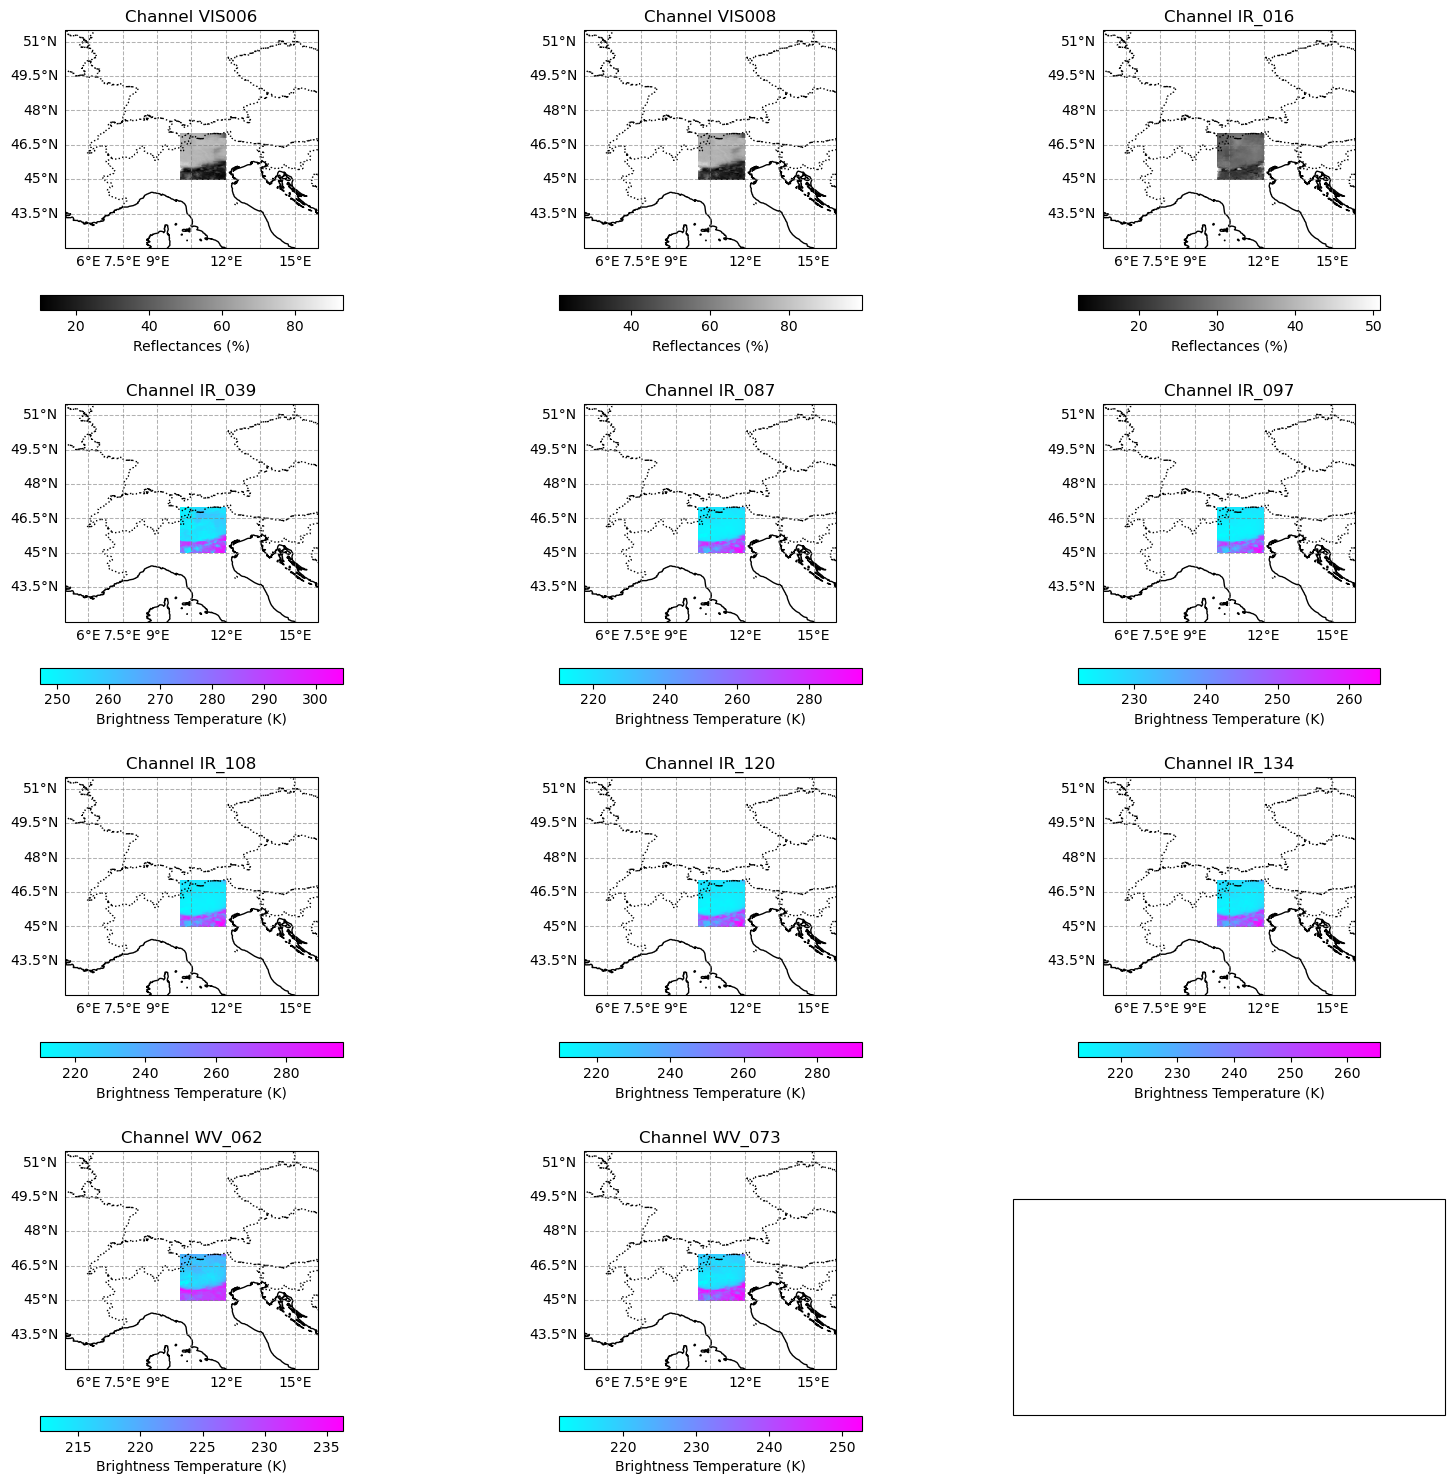

In [19]:
# Coordinates for Trento area
lon_min, lon_max, lat_min, lat_max = 10, 12, 45, 47

# Assuming 'ds' is your xarray Dataset and has coordinates named 'lat' and 'lon'
ds_Trento = ds.copy(deep=True)  # Making a deep copy of the dataset

# Compute the conditions
condition = ((ds_Trento.lon >= lon_min) & (ds_Trento.lon <= lon_max) &
             (ds_Trento.lat >= lat_min) & (ds_Trento.lat <= lat_max)).compute()

# Crop the dataset around the specified coordinates
ds_Trento = ds_Trento.where(condition, drop=True)

plot_channels(channels, extent, ds_Trento.isel(time=50), channels_cmaps, channels_unit)




## Checking outliers

Now plot the distribution of the data to see if there are any weird/corrupted values
(Remember to insert some outliers by hand in some channels?)

In [ ]:
#Plot the distribution of the channels

def get_max_min(ds, ch):
    ch_values = ds[ch][:]
    ch_values = ch_values.values.flatten()
    ch_values = ch_values[~np.isnan(ch_values)]
    max = np.amax(ch_values)
    min = np.amin(ch_values)

    return min, max


def plot_distribution(channels, data_ss, channels_unit, bin_width):
    num_rows = 4
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axs = axs.flatten()

    # Plot each channel
    for i, channel in enumerate(channels):
        ch_data = data_ss[channel]
        ch_min, ch_max = get_max_min(data_ss, channel)
        bins = np.arange(ch_min, ch_max + bin_width, bin_width)

        # Effettuare il plot dei dati del canale corrente
        axs[i].hist(ch_data.values.flatten(), bins=bins, density=True) 

        axs[i].set_xlabel(channels_unit[i])

        axs[i].set_yscale('log')

        # Aggiungere il titolo del subplot
        axs[i].set_title(f'Channel {channel}')

    # Aggiusta il layout
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.4)

    # Mostra il plot
    plt.show()

plot_distribution(channels, ds_Trento, channels_unit, 1)


Where do you see outliers?
Why do you think the distribution of the channel 3.9 micron is like that?

#Parallax Correction

Open two files from the same time, one without parallax and the other with parallax

In [ ]:
# Open file with parallax
file_parallax = '/data/sat/msg/netcdf/parallax/2023/06/20230622-EXPATS-RG'
ds_parallax = xr.open_dataset(file_parallax)
ds_parallax = ds_parallax.isel(time=50) #Correspond to 2023-06-01 00:00

# Open file without parallax 
file_noparallax = "/data/sat/msg/netcdf/noparallax/2023/06/22/MSG3-SEVI-MSG15-0100-NA-20230622124242_regular_grid.nc"
ds_noparallax = xr.open_dataset(file_noparallax)
ds_noparallax = ds_noparallax.isel(time=0) 

# Plot only one channel for each dataset
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

reduce_area = lon_min, lon_max, lat_min, lat_max = 5, 12, 42, 48

# Plot one channel for both parallax and no parallax
plot_single_map(ds_parallax, reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_noparallax, reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()


Can you spot which is the main difference among the two plot? (Hint: look at the realtive postion of the clouds with respect to the grid)

In case of really high clouds what will happen if the satellite view is really slanted?

## Regridding Satellite Data

In this subsection it will be shown what to do if a ifferent grid want to be applied
Usually this is done when from the irregular native gri of the sattellite one one to regirdid in a equally spaced grid easy to handle. 

In this case, since the data are already given in a regular grid, we will just regrid the data in a different regular grid. When you plot the map, anyway you shouldn't notice any difference.

In [ ]:
# If lat and lon are directly aligned with y and x respectively, you can proceed
ds_new = ds_Trento.swap_dims({'y': 'lat', 'x': 'lon'})


# Confirm the change
#print(ds_new.lat.values)
#print(ds_new.lon.values)
#print(ds_new['IR_108'].isel(time=0).values)


# Create shifted latitude and longitude arrays
lat_shifted = ds_new.lat + 0.2
lon_shifted = ds_new.lon + 0.1

# Interpolate the dataset to the new shifted grids
ds_shifted = ds_new.interp(lat=lat_shifted, lon=lon_shifted, method='linear')
ds_shifted['lon'] = lon_shifted
ds_shifted['lat'] = lat_shifted
#print(ds_shifted.lat.values)
#print(ds_shifted.lon.values)
#print(ds_shifted['IR_108'].isel(time=0).values)


# Plot only one channel for each dataset
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

reduce_area = lon_min, lon_max, lat_min, lat_max = 9, 13, 44, 48

# Plot one channel for both parallax and no parallax
plot_single_map(ds_new.isel(time=50), reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_shifted.isel(time=50), reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()

What can happen when interpolating close to the boundaries of your domain? How can you solve that?


In caso you would have a cloud mask for example, defined as a catecorigal variable (0: clear sky, 1: cloudy), would yu still use linear method for the regrid?

Regridding can be also applied to increase/deacrease the resolution of your data. How would you do in instead of a regular grid of 0.04° you would like to have a regular grid with a step of 0.02°?





## Section 2:  Physics of the Channels

Select a few timesteps for the hailstorm. Plot single channels and make a gif of the hailstorm events, maybe ask where there are the deep convective and why? So they should check at the brightness temperature, if it’s cold it means high clouds. And reflectances are also high (thick clouds).

Let them plot RGB images using Satpy (create env with satpy instlled from terminal before accessing the notebook, than choose that kernel). Ask which features are visible with RGB computed using VIS that are not visible using IR channels (mainly ground). 
Plot also IR combinations, the one relative to some CLoud proxy. And let them identify where the precipitating clouds or ice clouds for example. If they do cover this in the theoretical lecture, also ask them why.


# Imports





In [27]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import cartopy

# 2.1 Check Clouds Temporal Evolution

Here, you will plot a animated gif to check how cloud evolution using an Infrared channel (10.8) and one visible (0.6).

In [ ]:
# Load your dataset (assuming it's already loaded as `ds`)
# Define the time range
start_time = pd.to_datetime('2023-07-24T12:00')
end_time = pd.to_datetime('2023-07-24T15:00')

# Select the data within the time range for specific channels
IR_ch = ds['IR_108'].sel(time=slice(start_time, end_time))

# Assuming ds is already loaded and IR_ch selected
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Compute the global minimum and maximum for color scaling
#vmin = IR_ch.min().compute() if hasattr(IR_ch.data, 'compute') else IR_ch.min()
#vmax = IR_ch.max().compute() if hasattr(IR_ch.data, 'compute') else IR_ch.max()


# Update function for the animation
def update(frame):
    ax.clear()  # Clear the axis to update the frame
    data_slice = IR_ch.isel(time=frame)  # Use the subset `IR_ch`

    # Assuming the data coordinates are in longitude and latitude
    img = ax.pcolormesh(data_slice['lon'], data_slice['lat'], data_slice.values,
                        transform=ccrs.PlateCarree(), cmap='viridis')  # Choose an appropriate colormap

    ax.coastlines()  # Add coastlines
    ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add borders, if desired
    #cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
    #cbar.set_label('Brightness Temperature (K)')
    ax.set_extent(extent)

    ax.set_title(f"Timestamp: {data_slice.time.values}")
    return img,


# Number of frames is the number of time steps in the IR_ch subset
num_frames = len(IR_ch['time'])

ani = FuncAnimation(fig, update, frames=num_frames, blit=False)  # Set blit=False when using features like coastlines

HTML(ani.to_jshtml())


describe what you see. What is happening in the figure? Can you spot the deep comvetion system?

Try to repordue the same gif but using a visible channel. What is the difference?

Maybe add the temporal trend here of the two channel?

##2.2 Create an RGB images

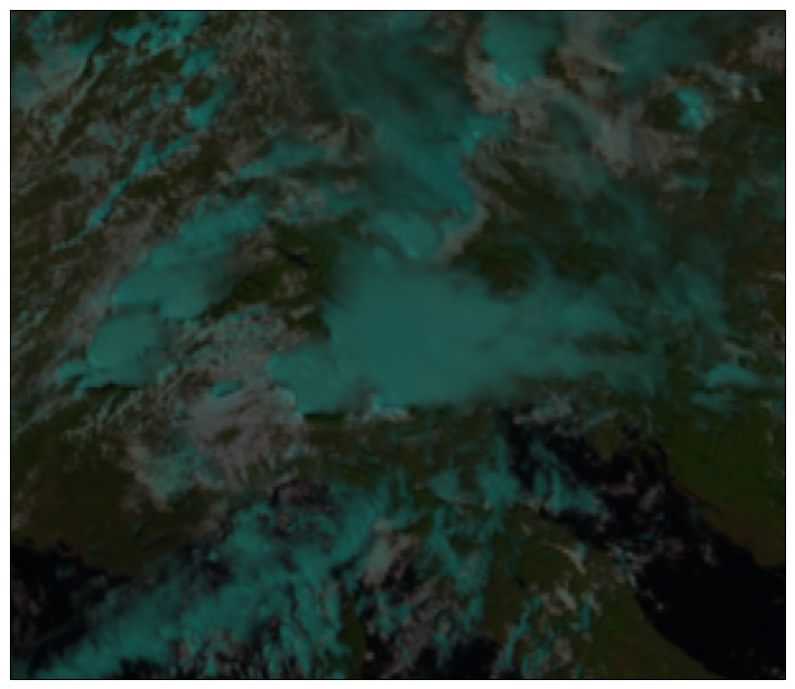

In [37]:
import satpy

# Define the directory where your MSG data files are stored
filename = '/data/sat/msg/nat/2023/07/24/MSG3-SEVI-MSG15-0100-NA-20230724131242.380000000Z-NA.subset.nat'

# Create a Scene object
scn = satpy.Scene(reader='seviri_l1b_native', filenames=[filename])

# If you want to create a composite image (true color or similar)
scn.load(['natural_color'])  # This requires RGB channels, adjust as needed
scn.show('natural_color')

#Crop to area of interest
extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5
crop_scn = scn.crop(ll_bbox=(lon_min, lat_min, lon_max, lat_max))

#get coord in the cropped area
a#rea_crop = crop_scn['natural_color'].attrs['area'] #area in m
#sat_lon_crop, sat_lat_crop = area_crop.get_lonlats()

sat_data_crop = crop_scn['natural_color'].values 
sat_data_crop = np.transpose(sat_data_crop, (1, 2, 0))  # Rearrange dimensions to (height, width, 3)

# Create a plot with a geographic projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Plot the RGB data
ax.imshow(np.fliplr(sat_data_crop).astype(int), origin='lower', extent=extent, transform=ccrs.PlateCarree())

# Show the plot
plt.show()

Which are clearly the features that are visibile using the RGB from VIS channels?
What about the clouds?

## 2.3 Infrared channel combinations

Explore channel combinations using difference among IR channels and chack at which cloud physical property they corresponf

3.9-10.8, CWP during nightime: 
for thin clouds with small or large particles (small or medium CWP), respectively brightness temperature diﬀerences reach the highest values. Thick clouds with small particles (medium CWP) lead to small values of brightness temperature diﬀerences. large particles together with a high optical thickness (high CWP) result in medium values of brightness temperature diﬀerences. A raining cloud indicates mean values of brightness temperature diﬀerences.

3.9-7.3  CWP nightime
for thin clouds with small or large particles (small or medium CWP), respectively brightness temperature diﬀerences reach the highest values. Thick clouds with small particles (medium CWP) lead to small values of brightness temperature diﬀerences. large particles together with a high optical thickness (high CWP) result in medium values of brightness temperature diﬀerences. A raining cloud indicates mean values of brightness temperature diﬀerences.

8.7-10.8 CP CWP
Radiative transfer simulations show that for ice clouds, BTD2 tends to be positive, whereas for low-level water clouds, BTD2 tends to be small negative. The increase of water particle absorption is greater between 11
and 12 μm than between 8 and 11 μm. On the other hand the increase
of ice particle absorption is greater between 8 and 11 μm than between 11 and 12 μm


10.8-12 CP COT
discriminate optically thick clouds from optically thin clouds. optically thick cloud shows smaller BTD1, while optically thin cloud
shows larger BTD1. In general, optically thick clouds produce precipitation.

6.2-10.8 CTH, CT
largely used in distinguishing between high-level and low-level/mid-level clouds. It usually takes very small negative values for
upper level thick clouds. Positive diﬀerences may occur when water vapour is present in the stratosphere above the cloud top, which is a sign of convective cloud tops. Mean BTD3 at the time of maximum extent of the deep convective clouds is very close to zero

7.3-12 CTH, CT
Info about the cth relative to the tropopause, essential to separate convective clouds from non-precipitating cirrus clouds using difference between water vapor and infrared, so theoretically similar to BTD 6.2-10.8.



<xarray.Dataset> Size: 193MB
Dimensions:        (y: 239, x: 351, time: 96)
Coordinates:
    lat            (y) float32 956B dask.array<chunksize=(239,), meta=np.ndarray>
    lon            (x) float32 1kB dask.array<chunksize=(351,), meta=np.ndarray>
  * time           (time) datetime64[ns] 768B 2023-07-24 ... 2023-07-24T23:04:05
Dimensions without coordinates: y, x
Data variables:
    WV_062-IR_108  (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_087-IR_108  (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_108-IR_120  (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_039-IR_108  (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    IR_039-WV_073  (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>
    WV_073-IR_120  (time, y, x) float32 32MB dask.array<chunksize=(1, 239, 351), meta=np.ndarray>


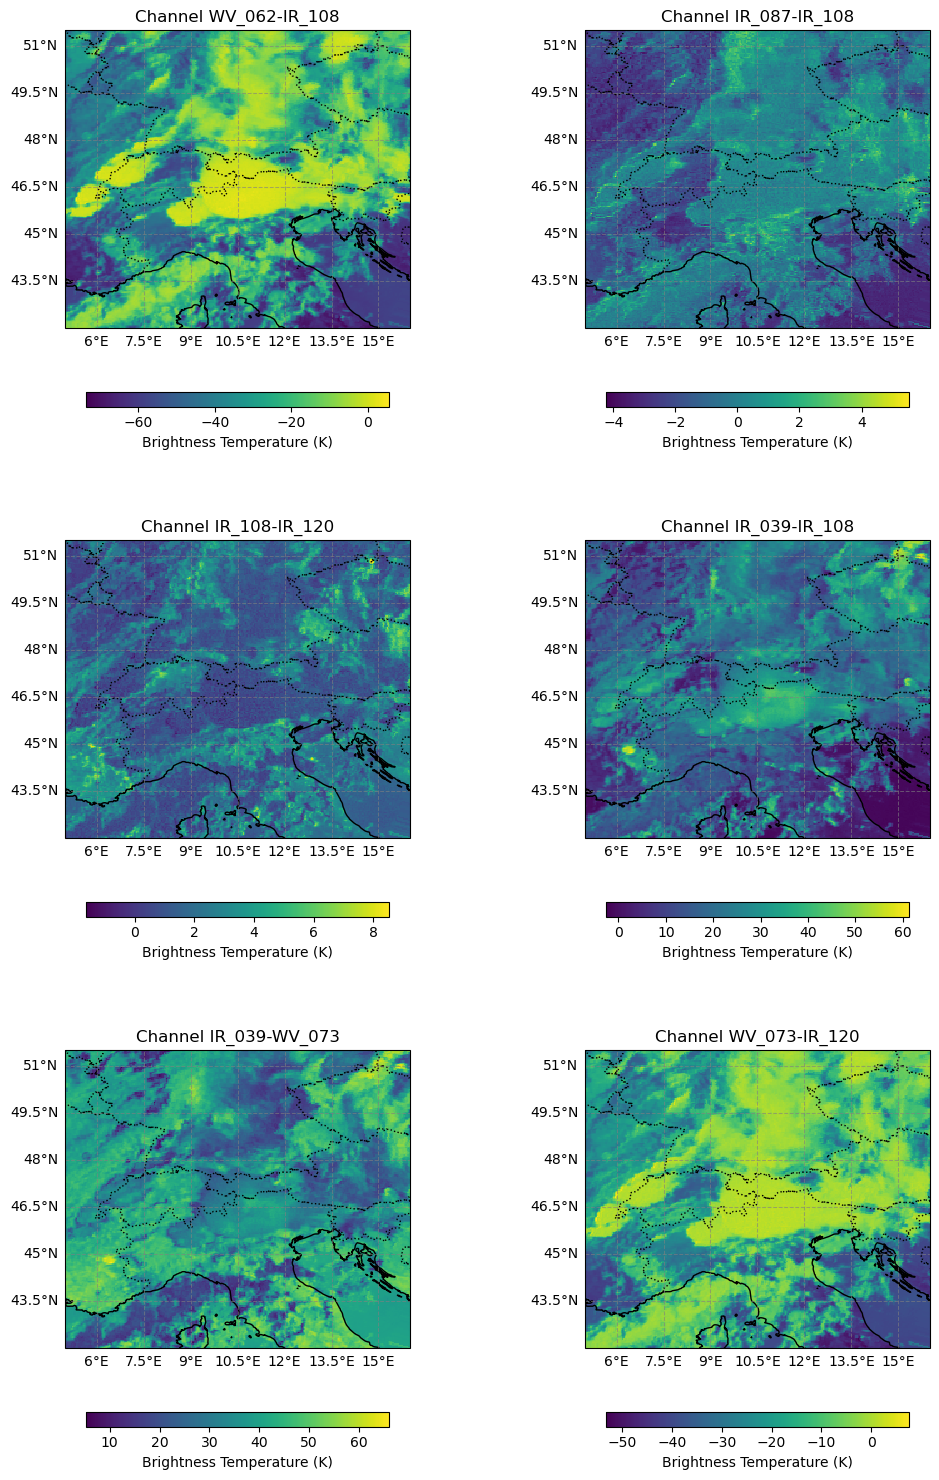

In [10]:
# Create a new dataset for combinations, copying coordinates from the dataset we are using
combinations_ds = xr.Dataset(coords=ds.coords)
#print(combinations_ds)

# Calculate combinations and add them to the new dataset
combinations_ds['WV_062-IR_108'] = ds['WV_062'] - ds['IR_108']
combinations_ds['IR_087-IR_108'] = ds['IR_087'] - ds['IR_108']
combinations_ds['IR_108-IR_120'] = ds['IR_108'] - ds['IR_120']
combinations_ds['IR_039-IR_108'] = ds['IR_039'] - ds['IR_108']
combinations_ds['IR_039-WV_073'] = ds['IR_039'] - ds['WV_073']
combinations_ds['WV_073-IR_120'] = ds['WV_073'] - ds['IR_120']

print(combinations_ds)

#plot each combination
channels = ['WV_062-IR_108','IR_087-IR_108', 'IR_108-IR_120', 'IR_039-IR_108' , 'IR_039-WV_073', 'WV_073-IR_120']
channels_unit = [ 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)','Brightness Temperature (K)']
channels_cmaps = ['viridis','viridis','viridis','viridis','viridis','viridis']
extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5

# Select a timestamp
data_ss = combinations_ds.isel(time=50)

# Define a Figure
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# Plot each channel
for i, channel in enumerate(channels):
    plot_single_map(data_ss, extent, channel,axs[i],channels_unit[i],channels_cmaps[i])

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Show plot
plt.show()


## Resources

Put here Data EUMETSAT, Data Tailor etc. 

Important Python Packages and tutorials 

## References

Some important references about satellite remote sensing